In [3]:
############################# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
###############################Importing Data and description
df = pd.read_csv("IRIS.csv")

pd.set_option('display.max_columns', None)


In [7]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
print(df.shape)

(150, 5)


In [10]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='Count'>

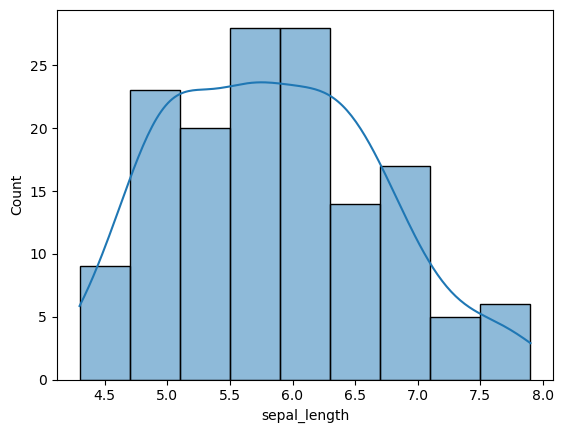

In [14]:
#Distribution of columns one by one
###########################sepal_length columnnnnnnnnnnnn

# draw a histogram to see the distribution of sepal_length column
sns.histplot(data=df, x='sepal_length',  kde=True)

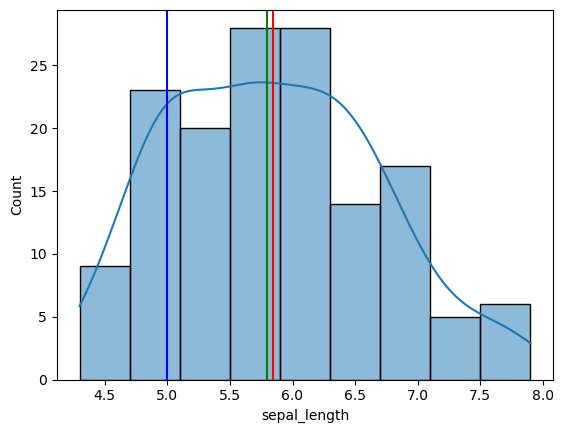

In [15]:
# plot the mean, median and mode of sepal_length column using sns
sns.histplot(df['sepal_length'], kde=True)
plt.axvline(df['sepal_length'].mean(), color='red')
plt.axvline(df['sepal_length'].median(), color='green')
plt.axvline(df['sepal_length'].mode()[0], color='blue')

In [16]:
# print the value of mean, median and mode of sepal_length column
print('Mean:', df['sepal_length'].mean())
print('Median:', df['sepal_length'].median())
print('Mode:', df['sepal_length'].mode()[0])


Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


<Axes: xlabel='sepal_length', ylabel='Count'>

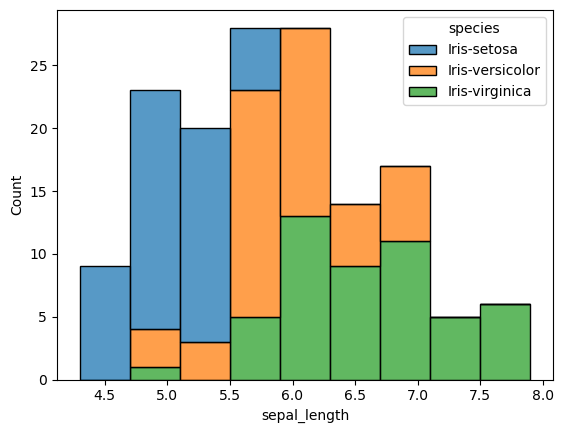

In [17]:
# draw a histogram if see the distribution of sepal_length column as species
sns.histplot(data=df, x='sepal_length', hue='species', multiple='stack')

<Axes: xlabel='sepal_width', ylabel='Count'>

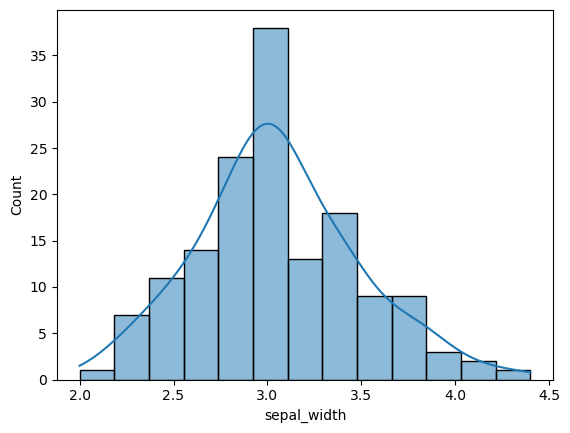

In [18]:
########################### sepal_width columnnnnnnnnnnnn
sns.histplot(data=df, x='sepal_width', kde=True)

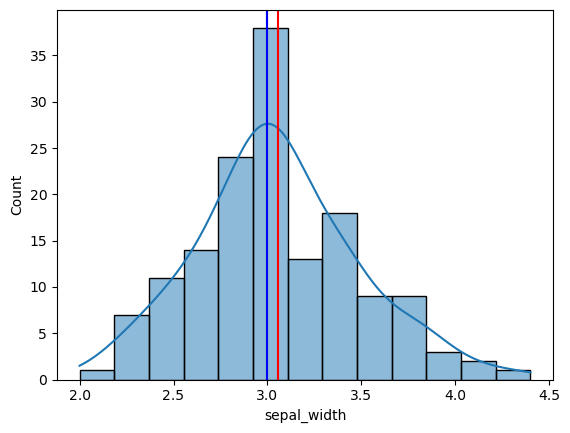

In [20]:
sns.histplot(df['sepal_width'], kde=True)
plt.axvline(df['sepal_width'].mean(), color='red')
plt.axvline(df['sepal_width'].median(), color='green')
plt.axvline(df['sepal_width'].mode()[0], color='blue')

In [21]:
print('Mean:', df['sepal_width'].mean())
print('Median:', df['sepal_width'].median())
print('Mode:', df['sepal_width'].mode()[0])

Mean: 3.0540000000000003
Median: 3.0
Mode: 3.0


<Axes: xlabel='sepal_width', ylabel='Count'>

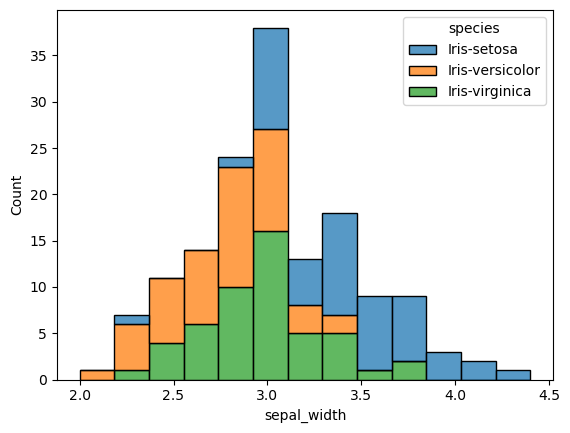

In [22]:
sns.histplot(data=df, x='sepal_width', hue= 'species', multiple='stack')

<Axes: xlabel='petal_length', ylabel='Count'>

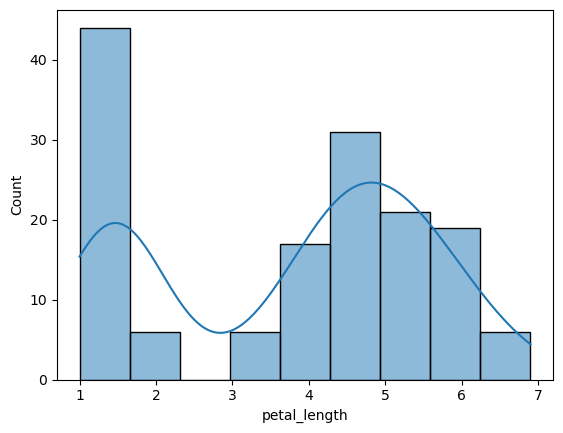

In [23]:
############################# petal_length columnnnnnnnnnnnn
sns.histplot(data=df, x='petal_length', kde=True)

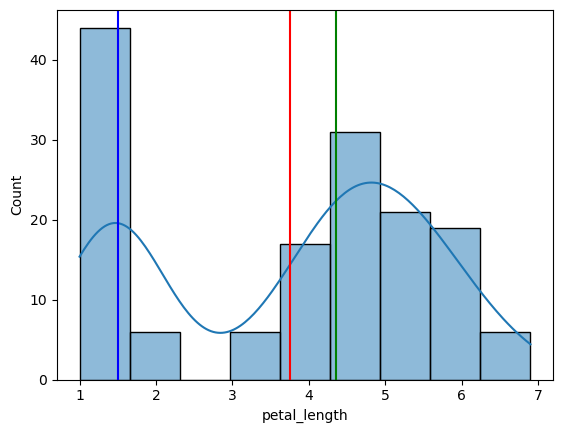

In [24]:
sns.histplot(df['petal_length'], kde=True)
plt.axvline(df['petal_length'].mean(), color='red')
plt.axvline(df['petal_length'].median(), color='green')
plt.axvline(df['petal_length'].mode()[0], color='blue')


In [27]:
print('Mean:', df['petal_length'].mean())
print('Median:', df['petal_length'].median())
print('Mode:', df['petal_length'].mode()[0])

Mean: 3.758666666666666
Median: 4.35
Mode: 1.5


<Axes: xlabel='petal_length', ylabel='Count'>

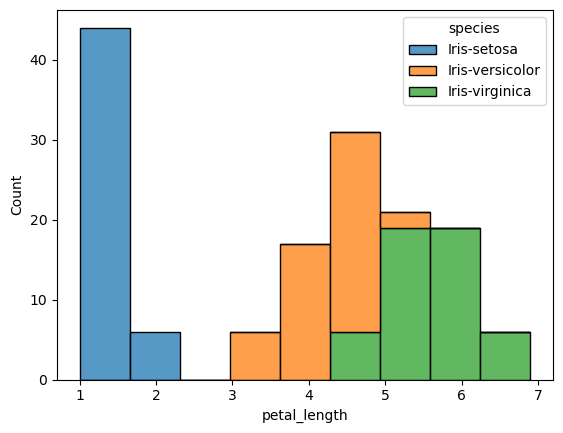

In [28]:
sns.histplot(data=df, x='petal_length', hue= 'species', multiple='stack')

<Axes: xlabel='petal_width', ylabel='Count'>

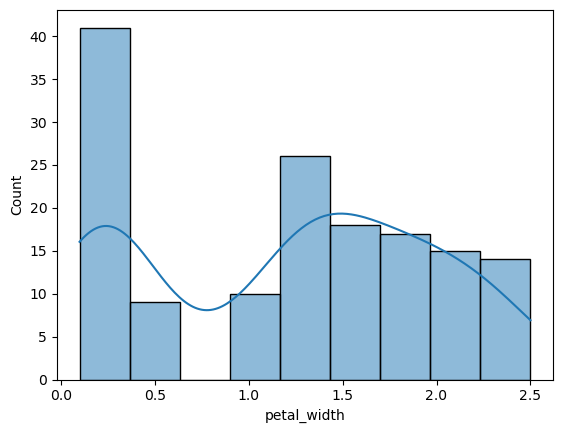

In [29]:
############################# petal_width columnnnnnnnnnnnn
sns.histplot(data=df, x='petal_width', kde=True)

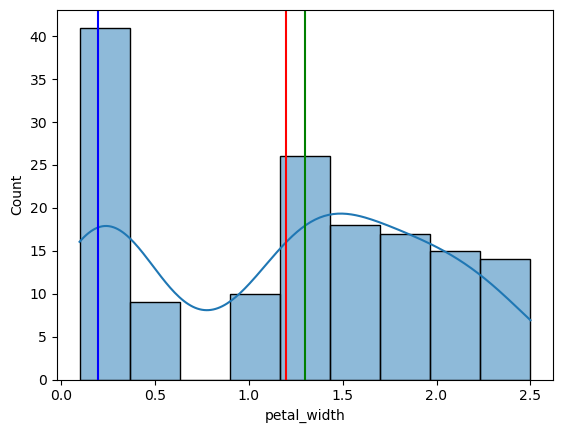

In [30]:
sns.histplot(df['petal_width'], kde=True)
plt.axvline(df['petal_width'].mean(), color='red')
plt.axvline(df['petal_width'].median(), color='green')
plt.axvline(df['petal_width'].mode()[0], color='blue')

In [31]:
print('Mean:', df['petal_width'].mean())
print('Median:', df['petal_width'].median())
print('Mode:', df['petal_width'].mode()[0])

Mean: 1.1986666666666668
Median: 1.3
Mode: 0.2


<Axes: xlabel='petal_width', ylabel='Count'>

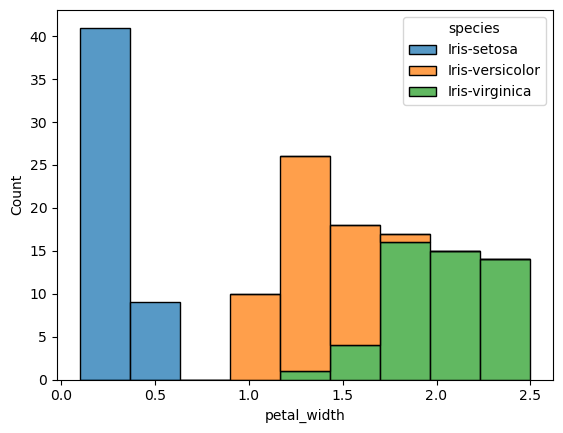

In [32]:
sns.histplot(data=df, x='petal_width', hue= 'species', multiple='stack')

In [33]:
###############################species columnnnnnnnnnnnn

df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
df['species'].nunique()

3

In [35]:
# value count of species column
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [39]:
# Encode the object species column
le_species = LabelEncoder()
df['species'] = le_species.fit_transform(df['species'])
# we done feature scaling to get in same range values
# import the scalar
scalar = MinMaxScaler()
# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [40]:
#############################Check Missing Values###############

df.isnull().sum().sort_values(ascending = False)



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

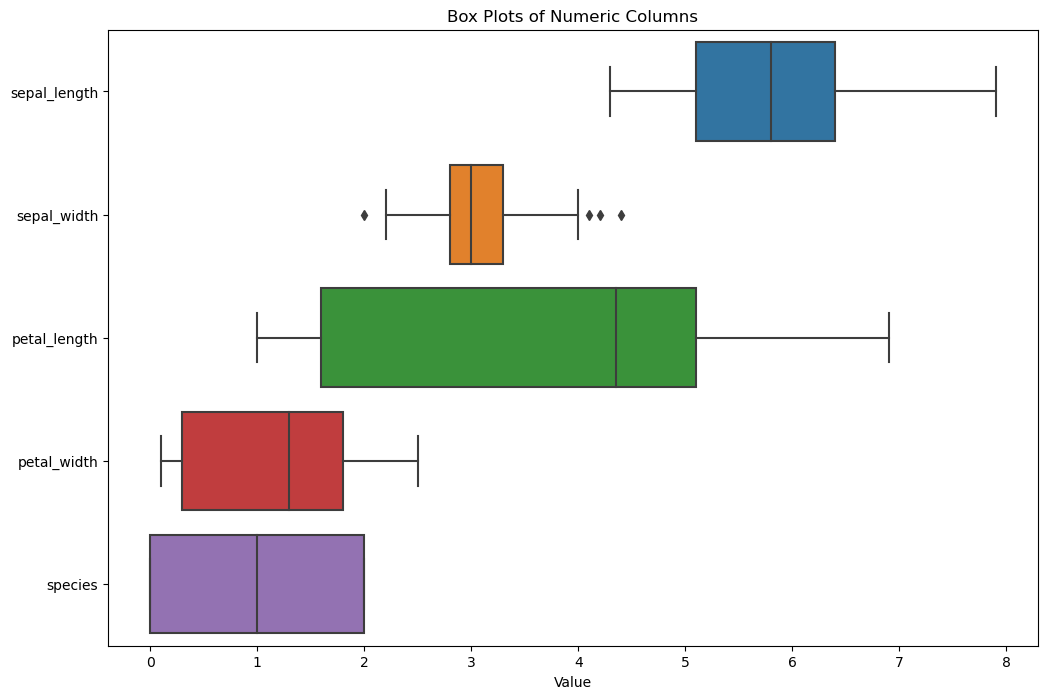

In [41]:
#############################Dealing with Outliers##############

# make box plots of all the numeric columns one by one
#import seaborn as sns
#import matplotlib.pyplot as plt
#numeric_columns = df.select_dtypes(include=['int', 'float']).columns

#for col in numeric_columns:
#    plt.figure(figsize=(8, 6))
#    sns.boxplot(data=df[col])
#    plt.title(f'Box Plot of {col}')
#    plt.xlabel(col)
#    plt.show()


# make box plots of all the numeric columns combine
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Box Plots of Numeric Columns')
plt.xlabel('Value')
plt.show()

In [42]:
###########################Splitting data

X = df.drop('species', axis=1)
y = df['species']

In [43]:
####################### Method 1 k fold cross validation

# Define number of folds for cross-validation
num_folds = 5

# Initialize KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize classifiers
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [44]:
# Perform cross-validation for KNN
knn_cv_scores = cross_val_score(knn_model, X, y, cv=kf)

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf)

# Perform cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X, y, cv=kf)

In [45]:
# Print cross-validation scores
print("KNN Cross-validation scores:", knn_cv_scores)
print("Random Forest Cross-validation scores:", rf_cv_scores)
print("Decision Tree Cross-validation scores:", dt_cv_scores)

KNN Cross-validation scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Random Forest Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Decision Tree Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]


In [51]:
# Print mean and standard deviation of cross-validation scores
print("Mean KNN CV score:", knn_cv_scores.mean())
print("Standard deviation of KNN CV scores:", knn_cv_scores.std())

print("Mean Random Forest CV score:", rf_cv_scores.mean())
print("Standard deviation of Random Forest CV scores:", rf_cv_scores.std())

print("Mean Decision Tree CV score:", dt_cv_scores.mean())
print("Standard deviation of Decision Tree CV scores:", dt_cv_scores.std())

Mean KNN CV score: 0.9733333333333334
Standard deviation of KNN CV scores: 0.024944382578492935
Mean Random Forest CV score: 0.9600000000000002
Standard deviation of Random Forest CV scores: 0.024944382578492935
Mean Decision Tree CV score: 0.9533333333333335
Standard deviation of Decision Tree CV scores: 0.02666666666666666
